# Chapter 2: $\pi$thon: Estimating Pi

### Math and Random Methods, Selection and Boolean Expressions, and the print Function

The purpose of this chapter is four-fold:
1. To further explore simple iteration design patterns
- To understand how accumulators work
- To understand simple selection statements
- To use random numbers as part of a simulation

All of the images are from our textbook and © Jones & Bartlett Learning.

In [ ]:
import math
math.pi

## 2.2 What is Pi?

Starting on page 39

Most people would define the number pi as 3.14, or, if they're really math-y perhaps a more precise number like 3.14159. ***But pi is actually defined as the ratio of a circle's circumference to its diameter.*** And it comes from the familiar equation $C=\pi\times d$ or, as we're most used to seeing it: $C=2\times \pi \times r$.

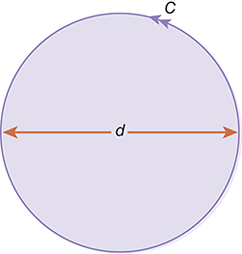

Think of it for squares: the ratio of a square's perimter to the length of its side is $P=4*d$. It turns out that the ratio for a circle is a little less, which we approimate as 3.14159. We use approximations of pi for all sorts of circular calculations, such as the volume of a sphere:

$$V=\frac{4}{3}\pi r^3$$

But pi is actually an irrational number, which means that its a decimal number with an infinite number of digits. We can approximate the value with several different techniques, which are themselves sums or products of infinite series.

In [ ]:
22 / 7

In [ ]:
355 / 113

In [ ]:
import math
9801 / (2206 * math.sqrt(2))

## 2.3 More About the `math` Module

Starting on page 41

In [ ]:
help("math")

In [ ]:
help("math.cos")

### Exercises

Complete the exercises on page 42:

- 2.1
- 2.2
- 2.3
- 2.4

In [6]:
help('math.sin')

Help on built-in function sin in math:

math.sin = sin(x, /)
    Return the sine of x (measured in radians).



## 2.4 The Archimedes Approach

Starting on page 43

Remember how Chapter 1 had us draw a "circle" by drawing a series of polygons of increasing number of sides? We're going to use the same approach here. The Archimedes approximation of $\pi$ takes a polygon and breaks it up into a collection of triangles. It's easy for us to calculate the length of a triangle's side using triganometry.

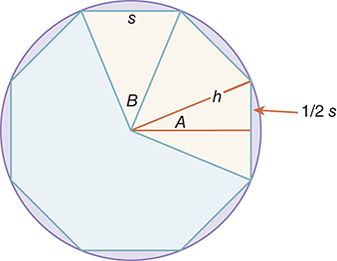

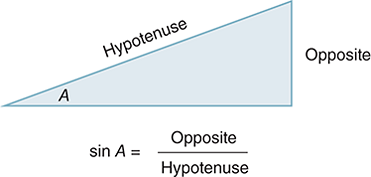

So all that we need to do is to calculate the length of $s=2\cdot h \cdot \sin(A)$ and then sum the number of triangles that make up the polygon. The more sides to our polygon, the closer we'll be to the true value of $\pi$

In [1]:
import math
circleRadius = 1
numSides = 8                                                        # we can change the number of sides

innerAngleB = 360.0 / numSides
halfAngleA = innerAngleB / 2

oneHalfSideS = circleRadius * math.sin(math.radians(halfAngleA))
lengthSideS = oneHalfSideS * 2

polygonCircumference = numSides * lengthSideS
pi = polygonCircumference / (2 * circleRadius)                     # C = 2 * pi * r
pi

3.0614674589207183

#### Turning it into a function

Let's take the working code and turn it into a function

In [3]:
import math

def archimedesPi(numSides):
   
    circleRadius = 1
    innerAngleB = 360.0 / numSides
    halfAngleA = innerAngleB / 2
    oneHalfSideS = circleRadius * math.sin(math.radians(halfAngleA))
    lengthSideS = oneHalfSideS * 2
    
    polygonCircumference = numSides * lengthSideS
    pi = polygonCircumference / (2 * circleRadius)
    return pi


print("Archimedes Approximation")
for numSides in range(3, 50):
    print(numSides, "sides is", archimedesPi(numSides));

Archimedes Approximation
3 sides is 2.598076211353316
4 sides is 2.8284271247461903
5 sides is 2.938926261462366
6 sides is 2.9999999999999996
7 sides is 3.037186173822907
8 sides is 3.0614674589207183
9 sides is 3.0781812899310186
10 sides is 3.090169943749474
11 sides is 3.0990581252557265
12 sides is 3.105828541230249
13 sides is 3.111103635738251
14 sides is 3.1152930753884016
15 sides is 3.1186753622663903
16 sides is 3.121445152258052
17 sides is 3.1237418028816957
18 sides is 3.125667198004746
19 sides is 3.127297215333944
20 sides is 3.1286893008046173
21 sides is 3.1298875896996634
22 sides is 3.130926442012273
23 sides is 3.1318329292136715
24 sides is 3.1326286132812378
25 sides is 3.1333308391076065
26 sides is 3.1339536866383995
27 sides is 3.134508681381216
28 sides is 3.13500533089262
29 sides is 3.1354515342943112
30 sides is 3.135853898029604
31 sides is 3.136217981610397
32 sides is 3.1365484905459393
33 sides is 3.1368494290380275
34 sides is 3.1371242217522677
35 si

### Exercises

Complete the exercises on page 47:

- 2.6

## 2.5 Accumulator Approximations

Starting on page 48

The idea of an accumulator is challenging to new programmers, but I think that you've used these enough with C# that it's no big deal.

In [ ]:
# Compute the sum of integers 1-5
1 + 2 + 3 + 4 + 5

In [ ]:
# Also computes the sum of integers 1-5 but this is more useful code
sum = 0
for x in range(1, 6):
    sum = sum + x
sum

In [ ]:
# We can write it as a function to make it the most useful
def sumIntsToN(n):
    sum = 0
    for x in range(1, n+1):
        sum = sum + x
    return sum

sumIntsToN(100)

### Exercises

Complete the exercises on page 49:

- 2.8
- 2.9
- 2.11

### Homework
Exercises 2.8, 2.9, and 2.11 are due as homework. Submit through code through Blackboard. You don't need a whole python file, you can just type up the python... it should be approximately 10 lines of code in total.

## -- End of Day 1 --

## Leibniz Formula for Calculating Pi

Gottfried Leibniz was a German mathematician who found a good way to approximate pi. We used his equation in CSC210 Operating Systems to demonstrate how parallel programs work. The formula is:

$$\pi = (\frac{4}{1}-\frac{4}{3}+\frac{4}{5}-\frac{4}{7}+\frac{4}{9}...)$$

Or, written as a summation, it would be:

$$\lim_{n \to \infty} \sum_{i=0}^n (-1)^i \frac{4}{2i+1}$$

The only hard part of this is the $-1^i$ term--what's it doing? Remember how exponents work, so $-1^3=(-1)(-1)(-1)=-1$. We just multiply -1 times itself a certain number of times. If it's an odd number of times, then the result is -1. If it's an even number of times, then the result is +1. Here are a few examples: 

|$i$|$-1^i$|
|---|------|
|$0$|$-1^0=1$|
|$1$|$-1^1=-1$|
|$2$|$-1^2=1$|
|$3$|$-1^3=-1$|
|$4$|$-1^4=1$|

We can calculate pi with Leibniz's formula using an accumulator!

In [ ]:
termCount = 3
num = 4
den = 1

acc = 0                        # accumulators for addition start at 0 (e.g., 0 + anything = anything)
for term in range(termCount):
    sign = (-1) ** term        # alternates - and +
    value =  sign * num / den  # the value of each term
    acc = acc + value          # accumulator
    den = den + 2              # increase denominator by two each time through the loop
acc

### Exercises

Complete the exercises on page 52:

- 2.15
- 2.16

In [18]:
def libz(endPoint):
    total = 0
    for i in range(0,endPoint):
        total += ((-1)**i)*(4/(2*i+1))
    return(total)
print(libz(10000))
print(libz(100000))

3.1414926535900345
3.1415826535897198


## Wallis Formula for Calculating Pi

The British mathematician John Wallis discovered another infinite series that can be used to approximate $\pi$

$$\pi = 2\times(\frac{2}{1}\times\frac{2}{3}\times\frac{4}{3}\times\frac{4}{5}\times\frac{6}{5}\times\frac{6}{7}\times\frac{8}{7}...)$$

The trick to this one is to break up the terms into pairs:

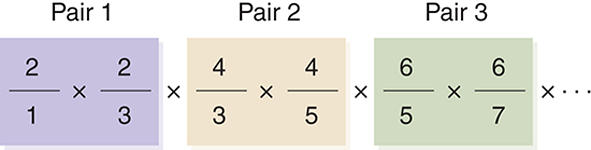

In [2]:
# Break it up into pairs:
#   2/1 * 2/3
#   4/3 * 4/5
#   6/5 * 6/7

pairCount = 1000
num = 2
den = 1

acc = 1                        # accumulators for multiplication start at 1 (e.g., 1 * anything = anything)
for term in range(pairCount):
    value = num / den * num / (den+2)
    acc = acc * value
    num = num + 2
    den = den + 2
pi = 2*acc
pi

3.1408077460303976

### Exercises

Convert the Leibniz and Wallis approximations to python methods that take a single parameter `termCount`. Then complete the exercises on page 54:

- 2.18
- 2.19


In [5]:
def wallis(pairs):
    acc = 1
    num = 2
    for ePair in range(pairs):
        leftTerm = num/(num-1)
        rightTerm = num/(num+1)
        
        acc = acc*leftTerm*rightTerm
        num = num+2
        
    pi = acc*2
    return pi

In [6]:
print(wallis(20000))
print(wallis(100000))

3.141553384908641
3.141584799656923


## 2.6 A Monte Carlo Simulation

Starting on page 55

Monte Carlo simulations are an important part of mathematics (statistics) and computer science. They allow us to make calculations using trial and error, rather than coming up with some sort of magic formula. Basically, you create a test that can be "played" with random variables to calculate a probability or number.

In this case, we'll create a circular dartboard within square dartboard. The circle's diameter is the exact same length as one side of the square, so the circle fits inside with exactly four points touching the square (top, bottom, left, and right).

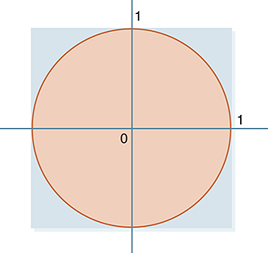

We'll "throw" a bunch of darts at the dartboard and then count how many ended up inside the circle vs how many ended up outside the circle but within the square. This ratio is directly related to the difference in area between these two shapes, and thus, to the value of $\pi$. To simplify the math, we'll only consider the upper right quadrant of the circle.

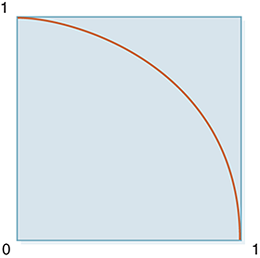

If we were to create a diagram that shows the results of our simulation, with blue dots representing "hits" within the circle and red dots representing "misses" outside the circle, it might look like this:

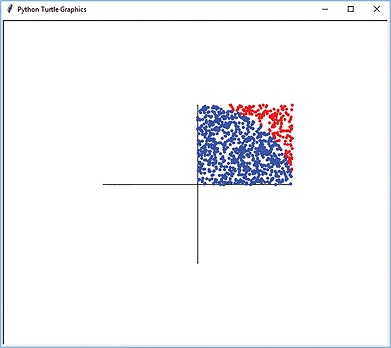

In this case, Monte Carlo simulations will help us practice using loops and writing functions. They will also introduce us to the python's random number generator, python's selection statements of `if`, `elif`, and `else` (along with their boolean and logical operators).

## x^2 + y^2 = d^2

In [ ]:
import random
random.random()

In [ ]:
random.random()

In [ ]:
for i in range(5):
    print(random.random())

In [ ]:
random.randint(1,100)

#### Comparison Operators

Python has comparison operators that are almost identical to C#: `==`, `!=`, `<`, `>`, `<=`, and `>=` (see page 57).

In [7]:
dogWeight = 25
dogWeight

25

In [8]:
dogWeight == 25

True

In [9]:
dogWeight != 25

False

In [10]:
dogWeight < 25

False

In [11]:
dogWeight <= 25

True

In [12]:
dogWeight == 5*5

True

#### Logic Operators

Python logic operators use words such as `and`, `or`, and `not` (see page 59). Their meaning is identical to C#'s `&&`, `||`, and `!`.

In [13]:
6 < 7 and 3 < 7

True

In [14]:
6 < 10 and 10 < 6 

False

In [15]:
4 != 4 or 5 < 8

True

In [16]:
4 != 4 or 8 < 5

False

In [17]:
not 6 < 10

False

In [18]:
not 10 < 6

True

#### Selection Statements (Branching)

Python selection statements use two of the same keywords as C# but the format follows Python's use of the ':' operator and indented code blocks.

C# combines `if` and `else` to form the logical "if your age is greater than 18, you can legally vote; ***otherwise, if*** your age is greater than 16, you can legally drive." In python, we combine these into the `elif` keyword.

In [ ]:
a = 5
b = 3
if a > b:
    print("a is larger")
else:
    print("b is larger")

In [19]:
def getLetterGrade(score):
    grade = ''
    mod   = ''
    
    if score >= 90:
        grade = 'A'
        if score >= 97:
            mod = '+'
        elif score <= 93:
            mod = '-'
    
    elif score >= 80:
        grade = 'B'
        if score >= 87:
            mod = '+'
        elif score <= 83:
            mod = '-'
    
    elif score >= 70:
        grade = 'C'
        if score >= 77:
            mod = '+'
        elif score <= 73:
            mod = '-'
    
    elif score >= 60:
        grade = 'D'
        if score >= 67:
            mod = '+'
        elif score <= 63:
            mod = '-'
            
    else:
        grade = 'F'
    return grade + mod

print(getLetterGrade(88))
print(getLetterGrade(64))
print(getLetterGrade(91))

B+
D
A-


### Exercises

Complete the exercises starting on page 64:

- 2.28
- 2.32
- 2.35

In [20]:
print("indentation")

indentation


In [24]:
def _isLeapYear(year):
    if year % 4 != 0:
        return False
    if year % 400 == 0:
        return False
    return True
print(_isLeapYear(400))
print(_isLeapYear(4))

False
True


In [29]:
def _payRate(r,h):
    t = 0
    p = 0
    if(h>40):
        t = h-40
        h = 40
        p = r*h+t*(r*1.5)
    else:
        p = r*h
    return p

### Back to Monte Carlo Simulations

To calculate $\pi$ in a simulation, we want to randomly throw a ***cyber dart*** <snicker> <snicker> against a cyber board. All darts will land within the square but only some of the darts will land within the arc of the circle. The ratio of darts within the arc to darts outside of it will give us an approximation to $\pi$.

In [56]:
import math
import random

def monteCarloPi(dartCount):
    
    dartsWithinCircle = 0       # addition accumulator
    
    for i in range(dartCount):  # loop once for each dart
        x = random.random()     # random number [0..1]
        y = random.random()     # random number [0..1]
        
        distance = math.sqrt(x**2 + y**2)
        if distance < 1:        # assumes that the radius is 1... if not then 
            dartsWithinCircle = dartsWithinCircle + 1
            
    pi = 4 * dartsWithinCircle / dartCount
    return pi
    
monteCarloPi(100)

3.24

### Exercises

Complete the exercises on page 67:

- 2.36
- 2.37
- 2.38

### Homework
Exercises 2.32, 2.35, and 2.38 are due as homework. Submit through code through Blackboard. You can submit a python file, a jupyter notebook, or you can just cut-and-paste the python code into the submission window.

## -- End of Day 2 --

## Your Homework Project

### Overview

Your first major homework project is to implement a graphical Monte Carlo simulation that calculates the value of $\pi$. It will be a command line python program (e.g., not a notebook) and can use code that is similar to examples used in class. Your program should draw an axis, a square, and a circle. It should then throw 100 darts onto the board and calculate a value for $\pi$, displaying the number on top.

### Details

There should be two functions within your program. The first sets up all of graphics by setting the screen coordinates and then drawing the main graphics. The second function runs the simulation by graphically throwing the darts, mathematically calculating $\pi$, and then printing it at the top of the window. This second function should take a parameter that allows you to throw an arbitrary number of darts. But when you call the function from your program, it should only throw 100 darts (it can take too much time to graphically show a higher number of darts). The picture below shows 1000 darts, but yours should only use 100.

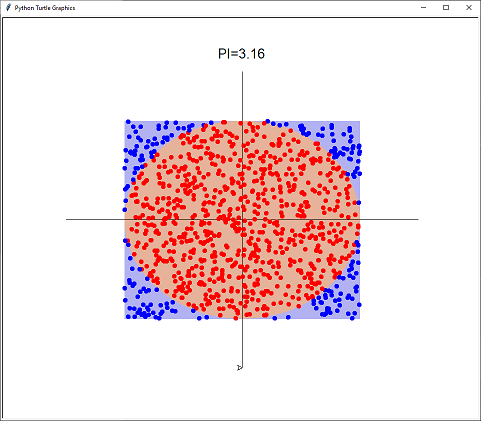

### Grading

This project is worth a total of 100 points and should be submitted through Blackboard. Scores will be assigned based on the following rubric:
* 10 points for the correct name 2020_Fall_FirstLast_MonteCarlo.py
* 10 points for running without crashing
* 10 points for drawing the axis
* 10 points for drawing the square and circle
* 10 points for generating random numbers within the proper range
* 10 points for the random darts graphically showing in the correct location on the screen
* 20 points for correctly calculating the simulated value of $\pi$--which is unlikely to be 3.14
* 10 points for drawing the simulated value of $\pi$ to the top of the window
* 10 points for having nicely formatted and reasonably commented code

### Hints

If you need some hints, see the skeleton code below. Section 2.6.5 of the book also shows how to draw one quandrant of this simulation. You'll need to extrapolate to produce all four quadrants.

In [38]:
import math
import random

def monteCarloPi(count):    
    dartsInCircle = 0

    for i in range(count):
        x = random.random()
        y = random.random()
        d = math.sqrt(x**2 + y**2)
        if d <= 1:
            dartsInCircle +=1
    pi = 4 * dartsInCircle / count
    return pi

In [45]:
monteCarloPi(500000)

3.1436

In [ ]:
import turtle
import random
import math



def initializeGraphics(scr, trt):
    pass                            # "pass" means that this function is not implemented yet

def monteCarloPi(dartCount, trt):
    pass

scr = turtle.Screen()
trt = turtle.Turtle()
initializeGraphics(scr, trt)
monteCarloPi(100, trt)
scr.exitonclick()